In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import ast

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('oil_data.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, {'joy': 0.5086571574211121, 'sadness': 0.2415652871131897, 'surprise': 0.1189970076084137, 'fear': 0.07388854771852493, 'anger': 0.056891996413469315} to {'fear': 0.3501052260398865, 'sadness': 0.29161536693573, 'joy': 0.2075057476758957, 'anger': 0.11218839883804321, 'surprise': 0.03858530521392822}
Data columns (total 8 columns):
keywords              34 non-null object
personality           34 non-null object
sentiment_hq_score    34 non-null float64
sentiment_score       34 non-null float64
source                34 non-null object
summarization         34 non-null object
title                 34 non-null object
url                   34 non-null object
dtypes: float64(2), object(6)
memory usage: 2.4+ KB


In [4]:
df['keywords']

emotion
{'joy': 0.5086571574211121, 'sadness': 0.2415652871131897, 'surprise': 0.1189970076084137, 'fear': 0.07388854771852493, 'anger': 0.056891996413469315}       {'oil': 0.44622262199371376, 'prices': 0.20287...
{'joy': 0.4003790616989136, 'sadness': 0.25952136516571045, 'fear': 0.19270633161067963, 'surprise': 0.085392527282238, 'anger': 0.062000662088394165}       {'oil': 0.2938447355982278, 'said': 0.20726886...
{'fear': 0.35872703790664673, 'sadness': 0.34308069944381714, 'joy': 0.12476236373186111, 'anger': 0.12027428299188614, 'surprise': 0.05315559357404709}     {'oil': 0.3371121480339946, 'fall': 0.22749523...
{'sadness': 0.31843820214271545, 'joy': 0.3087064027786255, 'surprise': 0.15666143596172333, 'fear': 0.14213567972183228, 'anger': 0.07405826449394226}      {'shell': 0.3174921531804709, 'oil': 0.2707186...
{'sadness': 0.34691107273101807, 'surprise': 0.25041404366493225, 'anger': 0.19996094703674316, 'joy': 0.12409403920173645, 'fear': 0.07861986756324768}     {'fuel'

In [5]:
df.head()

,keywords,personality,sentiment_hq_score,sentiment_score,source,summarization,title,url
emotion,,,,,,,,
"{'joy': 0.5086571574211121, 'sadness': 0.2415652871131897, 'surprise': 0.1189970076084137, 'fear': 0.07388854771852493, 'anger': 0.056891996413469315}","{'oil': 0.44622262199371376, 'prices': 0.20287...","{'extraversion': 0.391266872317104, 'openness'...",0.454241,0.597665,CNN,New York (CNN Business) The meltdown in the oi...,The Great Oil Crash of 2018: What's really hap...,https://www.cnn.com/2018/11/21/investing/oil-p...
"{'joy': 0.4003790616989136, 'sadness': 0.25952136516571045, 'fear': 0.19270633161067963, 'surprise': 0.085392527282238, 'anger': 0.062000662088394165}","{'oil': 0.2938447355982278, 'said': 0.20726886...","{'extraversion': 0.34852737440901294, 'opennes...",0.690439,0.461350,thisismoney,Oil prices last night crashed below $60 a barr...,Oil price plumbs the depths: Brent crude dives...,https://www.thisismoney.co.uk/money/markets/ar...
"{'fear': 0.35872703790664673, 'sadness': 0.34308069944381714, 'joy': 0.12476236373186111, 'anger': 0.12027428299188614, 'surprise': 0.05315559357404709}","{'oil': 0.3371121480339946, 'fall': 0.22749523...","{'extraversion': 0.3248061262449976, 'openness...",0.598535,0.529119,thisismoney,The price of oil slumped 7 per cent last night...,Oil slumps on fears of global slowdown: Brent ...,https://www.thisismoney.co.uk/money/markets/ar...
"{'sadness': 0.31843820214271545, 'joy': 0.3087064027786255, 'surprise': 0.15666143596172333, 'fear': 0.14213567972183228, 'anger': 0.07405826449394226}","{'shell': 0.3174921531804709, 'oil': 0.2707186...","{'extraversion': 0.37824542441610565, 'opennes...",0.709059,0.879406,thisismoney,Royal Dutch Shell booked £850million in revenu...,How Shell rakes in £850 every day as motorists...,https://www.thisismoney.co.uk/money/markets/ar...
"{'sadness': 0.34691107273101807, 'surprise': 0.25041404366493225, 'anger': 0.19996094703674316, 'joy': 0.12409403920173645, 'fear': 0.07861986756324768}","{'fuel': 0.38693061801832956, 'price': 0.27601...","{'extraversion': 0.30581903785972275, 'opennes...",0.268039,0.045611,thisismoney,Petrol stations have been encouraged to slash ...,Fuel prices 'must fall' as oil dips below $70 ...,https://www.thisismoney.co.uk/money/markets/ar...


In [6]:
cryptoData = df.to_dict(orient='records')
cryptoData = sorted(cryptoData, key = lambda k: k['sentiment_score'])

text = ""
for article in cryptoData:
    run = ast.literal_eval(article['keywords'])
    for value in run:
        text += value + " "

In [7]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [8]:
rbc_mask = np.array(Image.open("img/rbc_mask.png"))
rbc_mask

array([[[  0,  93, 170, 170],
        [  0,  93, 170, 170],
        [  0,  93, 170, 170],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,  93, 170, 255],
        [  0,  93, 170, 255],
        [  0,  93, 170, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,  93, 170, 255],
        [  0,  93, 170, 255],
        [  0,  93, 170, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0

In [9]:
transformed_rbc_mask = np.ndarray((rbc_mask.shape[0], rbc_mask.shape[1]), np.int32)

for i in range(len(rbc_mask)):
    transformed_rbc_mask[i] = list(map(transform_format, rbc_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
transformed_rbc_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
#Create and generate a word cloud image:
wordcloud = WordCloud(width=960, height=480, max_font_size=100, max_words=100, background_color='white').generate(text)

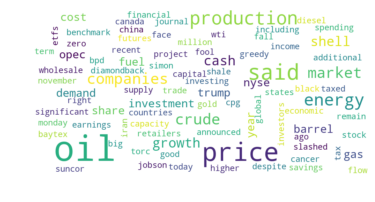

In [12]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wordcloud.to_file("img/wordcloud.png")